In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from dash import Dash, dcc, html, dash_table
import dash_bootstrap_components as dbc
from dash.dependencies import Output, Input
from dash.exceptions import PreventUpdate
from dash_bootstrap_templates import load_figure_template
import dash_dangerously_set_inner_html
import plotly.express as px
import plotly.graph_objects as go

In [2]:
mta_data = pd.read_csv('./data/MTA_Daily_Ridership.csv',parse_dates=['Date'])

In [3]:
mta_data.head()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
0,2020-03-01,2212965,97,984908,99,86790,100,55825,59,19922,113,786960,98,1636,52
1,2020-03-02,5329915,96,2209066,99,321569,103,180701,66,30338,102,874619,95,17140,107
2,2020-03-03,5481103,98,2228608,99,319727,102,190648,69,32767,110,882175,96,17453,109
3,2020-03-04,5498809,99,2177165,97,311662,99,192689,70,34297,115,905558,98,17136,107
4,2020-03-05,5496453,99,2244515,100,307597,98,194386,70,33209,112,929298,101,17203,108


In [4]:
mta_data = mta_data.rename(columns={
            'Subways: Total Estimated Ridership' : 'Subways',
            'Subways: % of Comparable Pre-Pandemic Day' : 'Subways: % of Pre-Pandemic',
            'Buses: Total Estimated Ridership' : 'Buses',
            'Buses: % of Comparable Pre-Pandemic Day' : 'Buses: % of Pre-Pandemic',
            'LIRR: Total Estimated Ridership' : 'LIRR',
            'LIRR: % of Comparable Pre-Pandemic Day' : 'LIRR : % of Pre-Pandemic',
            'Metro-North: Total Estimated Ridership' : 'Metro-North',
            'Metro-North: % of Comparable Pre-Pandemic Day' : 'Metro-North: % of Pre-Pandemic',
            'Access-A-Ride: Total Scheduled Trips' : 'Access-A-Ride',
            'Access-A-Ride: % of Comparable Pre-Pandemic Day' : 'Access-A-Ride: % of Pre-Pandemic',
            'Bridges and Tunnels: Total Traffic' : 'Bridges and Tunnels',
            'Bridges and Tunnels: % of Comparable Pre-Pandemic Day' : 'Bridges and Tunnels: % of Pre-Pandemic',
            'Staten Island Railway: Total Estimated Ridership' : 'Staten Island Railway',
            'Staten Island Railway: % of Comparable Pre-Pandemic Day' : 'Staten Island Railway: % of Pre-Pandemic'
            },
            )

In [5]:
mta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      1706 non-null   datetime64[ns]
 1   Subways                                   1706 non-null   int64         
 2   Subways: % of Pre-Pandemic                1706 non-null   int64         
 3   Buses                                     1706 non-null   int64         
 4   Buses: % of Pre-Pandemic                  1706 non-null   int64         
 5   LIRR                                      1706 non-null   int64         
 6   LIRR : % of Pre-Pandemic                  1706 non-null   int64         
 7   Metro-North                               1706 non-null   int64         
 8   Metro-North: % of Pre-Pandemic            1706 non-null   int64         
 9   Access-A-Ride                 

In [6]:
mta_data.head()

,Date,Subways,Subways: % of Pre-Pandemic,Buses,Buses: % of Pre-Pandemic,LIRR,LIRR : % of Pre-Pandemic,Metro-North,Metro-North: % of Pre-Pandemic,Access-A-Ride,Access-A-Ride: % of Pre-Pandemic,Bridges and Tunnels,Bridges and Tunnels: % of Pre-Pandemic,Staten Island Railway,Staten Island Railway: % of Pre-Pandemic
0,2020-03-01,2212965,97,984908,99,86790,100,55825,59,19922,113,786960,98,1636,52
1,2020-03-02,5329915,96,2209066,99,321569,103,180701,66,30338,102,874619,95,17140,107
2,2020-03-03,5481103,98,2228608,99,319727,102,190648,69,32767,110,882175,96,17453,109
3,2020-03-04,5498809,99,2177165,97,311662,99,192689,70,34297,115,905558,98,17136,107
4,2020-03-05,5496453,99,2244515,100,307597,98,194386,70,33209,112,929298,101,17203,108


In [7]:
mta_data.describe()

,Date,Subways,Subways: % of Pre-Pandemic,Buses,Buses: % of Pre-Pandemic,LIRR,LIRR : % of Pre-Pandemic,Metro-North,Metro-North: % of Pre-Pandemic,Access-A-Ride,Access-A-Ride: % of Pre-Pandemic,Bridges and Tunnels,Bridges and Tunnels: % of Pre-Pandemic,Staten Island Railway,Staten Island Railway: % of Pre-Pandemic
count,1706,1.706000e+03,1706.000000,1.706000e+03,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1.706000e+03,1706.000000,1706.000000,1706.000000
mean,2022-07-01 12:00:00,2.509055e+06,55.461313,1.006868e+06,54.692849,135960.116061,59.128370,114888.273154,51.083236,21941.532825,86.165299,8.556029e+05,93.375147,4429.355217,37.811254
min,2020-03-01 00:00:00,1.983990e+05,7.000000,5.498000e+03,1.000000,1903.000000,2.000000,3281.000000,3.000000,2506.000000,13.000000,1.567590e+05,18.000000,0.000000,0.000000
25%,2021-05-01 06:00:00,1.715396e+06,40.000000,7.152495e+05,53.000000,78689.750000,37.000000,51271.250000,29.000000,15869.500000,72.000000,8.103385e+05,90.000000,2077.250000,24.000000
50%,2022-07-01 12:00:00,2.459607e+06,61.000000,1.140776e+06,60.000000,124274.000000,60.000000,108237.000000,56.000000,22301.500000,84.000000,8.966345e+05,97.000000,4522.500000,40.000000
75%,2023-08-31 18:00:00,3.440053e+06,69.000000,1.347620e+06,65.000000,197928.000000,76.000000,176789.750000,71.000000,27506.750000,104.000000,9.473308e+05,102.000000,6812.750000,47.000000
max,2024-10-31 00:00:00,5.498809e+06,143.000000,2.244515e+06,126.000000,321569.000000,237.000000,249585.000000,193.000000,40468.000000,144.000000,1.043802e+06,120.000000,17453.000000,182.000000
std,NaN,1.062184e+06,19.819596,4.403799e+05,19.293307,71298.778711,29.297993,66500.207696,26.137311,7990.634806,24.645063,1.431840e+05,14.641962,2681.655564,19.273205


In [8]:
#mta_data.reset_index(inplace=True)

In [9]:
mta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      1706 non-null   datetime64[ns]
 1   Subways                                   1706 non-null   int64         
 2   Subways: % of Pre-Pandemic                1706 non-null   int64         
 3   Buses                                     1706 non-null   int64         
 4   Buses: % of Pre-Pandemic                  1706 non-null   int64         
 5   LIRR                                      1706 non-null   int64         
 6   LIRR : % of Pre-Pandemic                  1706 non-null   int64         
 7   Metro-North                               1706 non-null   int64         
 8   Metro-North: % of Pre-Pandemic            1706 non-null   int64         
 9   Access-A-Ride                 

In [10]:
mta_data_thousands = mta_data.copy()
columns_to_divide = [
    'Subways', 
    'Buses', 
    'LIRR', 
    'Metro-North',
    'Access-A-Ride',
    'Bridges and Tunnels',
    'Staten Island Railway'
]

# Perform the division and update only those columns
mta_data_thousands[columns_to_divide] = mta_data[columns_to_divide] / 1000

#### Resample the data to monthly level for visual display

In [11]:
mta_data_thousands.head()

,Date,Subways,Subways: % of Pre-Pandemic,Buses,Buses: % of Pre-Pandemic,LIRR,LIRR : % of Pre-Pandemic,Metro-North,Metro-North: % of Pre-Pandemic,Access-A-Ride,Access-A-Ride: % of Pre-Pandemic,Bridges and Tunnels,Bridges and Tunnels: % of Pre-Pandemic,Staten Island Railway,Staten Island Railway: % of Pre-Pandemic
0,2020-03-01,2212.965,97,984.908,99,86.790,100,55.825,59,19.922,113,786.960,98,1.636,52
1,2020-03-02,5329.915,96,2209.066,99,321.569,103,180.701,66,30.338,102,874.619,95,17.140,107
2,2020-03-03,5481.103,98,2228.608,99,319.727,102,190.648,69,32.767,110,882.175,96,17.453,109
3,2020-03-04,5498.809,99,2177.165,97,311.662,99,192.689,70,34.297,115,905.558,98,17.136,107
4,2020-03-05,5496.453,99,2244.515,100,307.597,98,194.386,70,33.209,112,929.298,101,17.203,108


In [12]:
monthly_data = mta_data_thousands.resample('ME', on='Date').mean() # 'ME' for monthly
monthly_data.reset_index(inplace=True)

#### Resample the data to quarterly level

In [13]:
quarterly_data = mta_data_thousands.resample('QE', on='Date').mean()  # 'QE' for quarterly
quarterly_data.reset_index(inplace=True)

In [14]:
weekly_data = mta_data_thousands.resample('W', on='Date').mean()  # 'W' for Weekly
weekly_data.reset_index(inplace=True)

In [15]:
annual_data = mta_data_thousands.resample('YE', on='Date').mean()  # 'YE' for quarterly
annual_data.reset_index(inplace=True)
annual_data['Year'] = annual_data['Date'].dt.year.astype(str)

#### Show sample monthly_data dataframe. To check columns and data

In [16]:
monthly_data.head()

,Date,Subways,Subways: % of Pre-Pandemic,Buses,Buses: % of Pre-Pandemic,LIRR,LIRR : % of Pre-Pandemic,Metro-North,Metro-North: % of Pre-Pandemic,Access-A-Ride,Access-A-Ride: % of Pre-Pandemic,Bridges and Tunnels,Bridges and Tunnels: % of Pre-Pandemic,Staten Island Railway,Staten Island Railway: % of Pre-Pandemic
0,2020-03-31,2375.007194,50.387097,1028.122065,53.419355,116.942710,46.387097,125.508613,51.580645,18.010645,68.548387,620.486129,69.032258,6.470452,47.967742
1,2020-04-30,391.015800,8.233333,15.717167,1.000000,7.244433,2.833333,8.144567,3.166667,6.061733,23.066667,330.540167,35.533333,0.655900,5.766667
2,2020-05-31,492.769387,10.774194,13.248516,1.000000,16.191226,7.322581,10.834452,5.129032,7.634129,30.064516,490.697548,52.064516,0.756677,6.612903
3,2020-06-30,797.610133,17.066667,21.945800,1.200000,39.887833,17.066667,20.593033,9.333333,11.547900,44.366667,677.180433,69.566667,1.372467,10.366667
4,2020-07-31,1048.676161,23.967742,26.713161,1.580645,57.693452,24.645161,29.492097,13.354839,14.365613,57.161290,763.319355,80.838710,2.009677,18.129032


Set Here are the colours and service names used by all visuals except for the pct visual

In [17]:
# Set the colours for all charts
full_colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
# Old Grey = #B3B3B3
colours = ['#1f77b4', '#CCCCCC', '#CCCCCC', '#CCCCCC', '#9467bd', '#CCCCCC', '#CCCCCC']
colours_pct = ['#CCCCCC', '#CCCCCC', '#CCCCCC', '#CCCCCC', '#9467bd', '#CCCCCC', '#e377c2']

services = ['Subways',
            'Buses',
            'LIRR',
            'Metro-North',
            'Access-A-Ride',
            'Bridges and Tunnels',
            'Staten Island Railway']

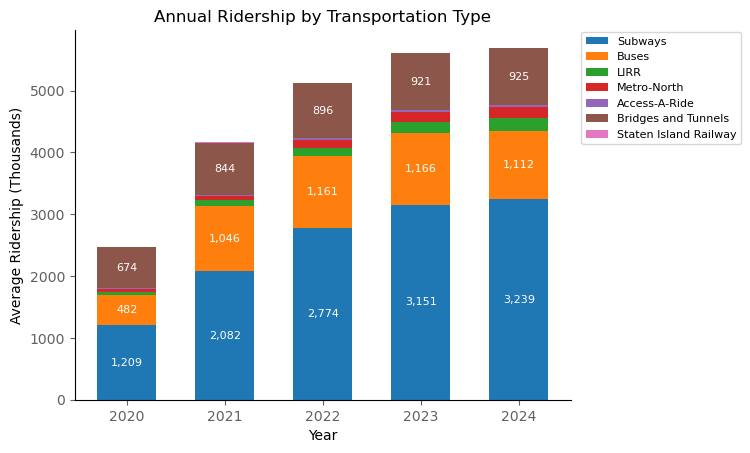

In [18]:
services_legend = [services,services]

fig, ax = plt.subplots()

# Initialize the bottom variable
bottom = np.zeros(len(annual_data))

# Plot stacked bars
for service in services:
    bars = ax.bar(
        annual_data['Year'],  # X-axis values (ensure it's a string)
        annual_data[service],  # Heights for each service
        bottom=bottom,  # Stack bars
        label=service,
        color=full_colours[services.index(service)],
        width=0.6  # Adjust bar width
    )

    # Add data labels for each bar
    for i, bar in enumerate(bars):
        if service in (['Subways','Buses','Bridges and Tunnels']):
            # Calculate the position for the label
            height = bar.get_height()  # Height of the bar
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Center of the bar
                bottom[i] + height / 2,  # Middle of the bar segment
                f"{height:,.0f}",  # Format label to 0 decimal places
                ha='center',  # Center-align the text horizontally
                va='center',  # Center-align the text vertically
                fontsize=8,   # Adjust font size
                color='white'  # Adjust text color for contrast
        )
        
    bottom += annual_data[service]  # Update bottom for stacking

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Ridership (Thousands)')
ax.set_title('Annual Ridership by Transportation Type')

# Add legend
ax.legend(
    bbox_to_anchor=(1.01, 1.01),
    fontsize=8
)

# Align xticks with years
ax.set_xticks(annual_data['Year'])

# Commented out as ax.set_xticks(annual_data['Year']) is shorter and easier to understand
#ax.xticks=np.arange(    
#    min(annual_data['Year'].astype(int)),
#    max(annual_data['Year'].astype(int)),
#    step=1)

# Format axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', colors='#606060')
ax.tick_params(axis='y', colors='#606060')

plt.savefig('Annual Ridership by Transportation Type.png')
plt.show();


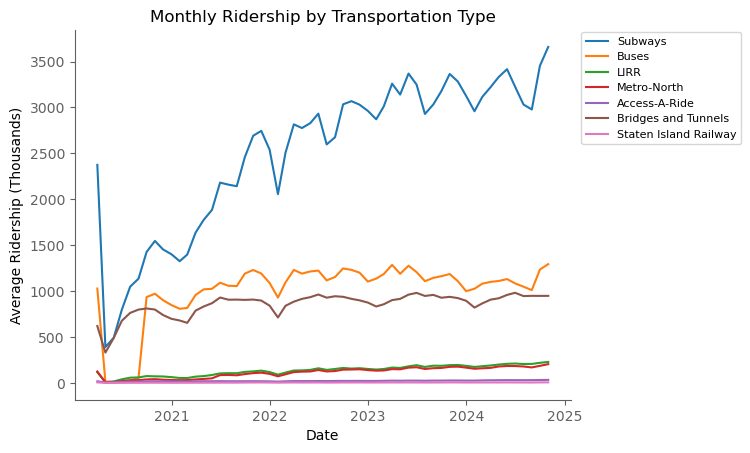

In [19]:
# Set the colours for all charts
full_colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
# Old Grey = #B3B3B3
colours = ['#1f77b4', '#CCCCCC', '#CCCCCC', '#CCCCCC', '#9467bd', '#CCCCCC', '#CCCCCC']
colours_pct = ['#CCCCCC', '#CCCCCC', '#CCCCCC', '#CCCCCC', '#9467bd', '#CCCCCC', '#e377c2']
fig, ax = plt.subplots()

services = ['Subways',
            'Buses',
            'LIRR',
            'Metro-North',
            'Access-A-Ride',
            'Bridges and Tunnels',
            'Staten Island Railway']

services_legend = [services,services]
for service in services:    
    ax.plot(
        monthly_data['Date'],
        monthly_data[service],  
        label=service,
        color=full_colours[services.index(service)]
    )    

ax.set_xlabel('Date')
ax.set_ylabel('Average Ridership (Thousands)')
ax.set_title('Monthly Ridership by Transportation Type')

handles, labels = services_legend

ax.legend(        
    bbox_to_anchor= (1.01,1.01),
    fontsize = 8
)
ax.xticks=np.arange(    
    min(monthly_data['Date'].dt.year),
    max(monthly_data['Date'].dt.year),
    step=1)

# Format the X & Y axes and remove the top and right borders

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_color('#606060')
ax.spines['bottom'].set_color('#606060')
ax.tick_params(axis='x', colors='#606060')  # X-axis ticks and labels
ax.tick_params(axis='y', colors='#606060')  # Y-axis ticks and labels

plt.show();

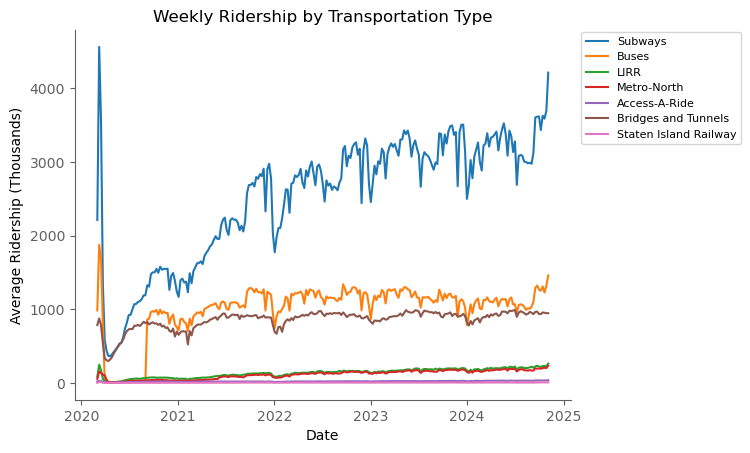

In [20]:
# Set the colours for all charts
full_colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
# Old Grey = #B3B3B3
colours = ['#1f77b4', '#CCCCCC', '#CCCCCC', '#CCCCCC', '#9467bd', '#CCCCCC', '#CCCCCC']
colours_pct = ['#CCCCCC', '#CCCCCC', '#CCCCCC', '#CCCCCC', '#9467bd', '#CCCCCC', '#e377c2']
fig, ax = plt.subplots()

services = ['Subways',
            'Buses',
            'LIRR',
            'Metro-North',
            'Access-A-Ride',
            'Bridges and Tunnels',
            'Staten Island Railway']

services_legend = [services,services]
for service in services:    
    ax.plot(
        weekly_data['Date'],
        weekly_data[service],  
        label=service,
        color=full_colours[services.index(service)]
    )    

ax.set_xlabel('Date')
ax.set_ylabel('Average Ridership (Thousands)')
ax.set_title('Weekly Ridership by Transportation Type')

handles, labels = services_legend

ax.legend(        
    bbox_to_anchor= (1.01,1.01),
    fontsize = 8
)
ax.xticks=np.arange(
    min(monthly_data['Date'].dt.year),
    max(monthly_data['Date'].dt.year),
    step=1)

# Format the X & Y axes and remove the top and right borders

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_color('#606060')
ax.spines['bottom'].set_color('#606060')
ax.tick_params(axis='x', colors='#606060')  # X-axis ticks and labels
ax.tick_params(axis='y', colors='#606060')  # Y-axis ticks and labels

plt.show();

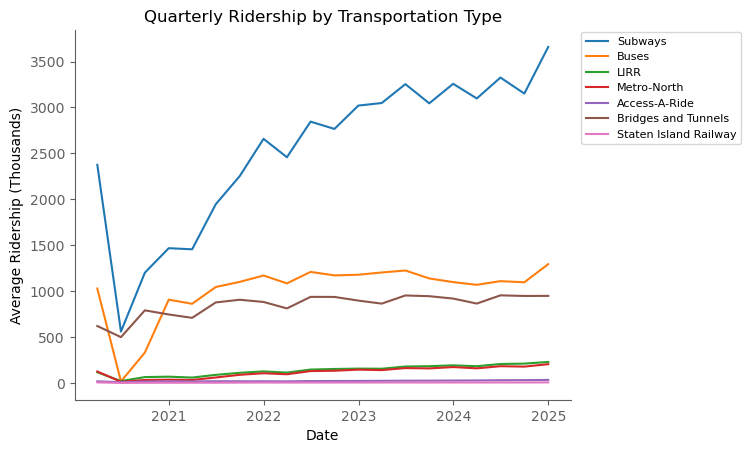

In [21]:
# Set the colours for all charts
full_colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
# Old Grey = #B3B3B3
colours = ['#1f77b4', '#CCCCCC', '#CCCCCC', '#CCCCCC', '#9467bd', '#CCCCCC', '#CCCCCC']
colours_pct = ['#CCCCCC', '#CCCCCC', '#CCCCCC', '#CCCCCC', '#9467bd', '#CCCCCC', '#e377c2']
fig, ax = plt.subplots()

services = ['Subways',
            'Buses',
            'LIRR',
            'Metro-North',
            'Access-A-Ride',
            'Bridges and Tunnels',
            'Staten Island Railway']

services_legend = [services,services]
for service in services:    
    ax.plot(
        quarterly_data['Date'],
        quarterly_data[service],  
        label=service,
        color=full_colours[services.index(service)]
    )    

ax.set_xlabel('Date')
ax.set_ylabel('Average Ridership (Thousands)')
ax.set_title('Quarterly Ridership by Transportation Type')

handles, labels = services_legend

ax.legend(        
    bbox_to_anchor= (1.01,1.01),
    fontsize = 8
)
ax.xticks=np.arange(
    min(monthly_data['Date'].dt.year),
    max(monthly_data['Date'].dt.year),
    step=1)

# Format the X & Y axes and remove the top and right borders

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_color('#606060')
ax.spines['bottom'].set_color('#606060')
ax.tick_params(axis='x', colors='#606060')  # X-axis ticks and labels
ax.tick_params(axis='y', colors='#606060')  # Y-axis ticks and labels

plt.show();

Subways: % of Pre-Pandemic
Buses: % of Pre-Pandemic
LIRR : % of Pre-Pandemic
Metro-North: % of Pre-Pandemic
Access-A-Ride: % of Pre-Pandemic
Bridges and Tunnels: % of Pre-Pandemic
Staten Island Railway: % of Pre-Pandemic


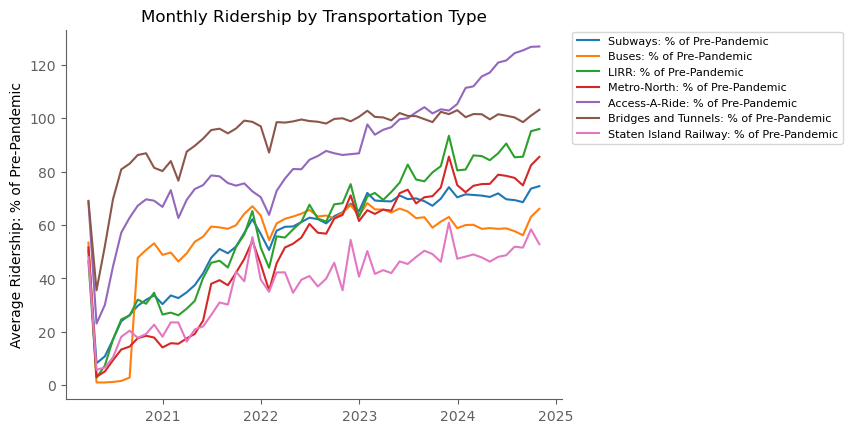

In [22]:
fig, ax = plt.subplots()

for service in services:    
    if service == 'LIRR':
        service_pct = f'{service} : % of Pre-Pandemic' 
    else:
        service_pct = f'{service}: % of Pre-Pandemic'  
    print(service_pct)
    ax.plot(
        monthly_data['Date'],
        monthly_data[service_pct],        
        label=f'{service}: % of Pre-Pandemic',
        #color=colours_pct[services.index(service)]
        color=full_colours[services.index(service)]
    )

#ax.set_xlabel('Date')
ax.set_ylabel('Average Ridership: % of Pre-Pandemic')
ax.set_title('Monthly Ridership by Transportation Type')
ax.xticks=np.arange(min(monthly_data['Date'].dt.year),max(monthly_data['Date'].dt.year),step=1)

handles, labels = services_legend
ax.legend(
   bbox_to_anchor= (1.01,1.01),
   fontsize = 8
)

# Format the X & Y axes and remove the top and right borders

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_color('#606060')
ax.spines['bottom'].set_color('#606060')
ax.tick_params(axis='x', colors='#606060')  # X-axis ticks and labels
ax.tick_params(axis='y', colors='#606060')  # Y-axis ticks and labels


plt.show();

In [23]:
quarterly_data.head()

,Date,Subways,Subways: % of Pre-Pandemic,Buses,Buses: % of Pre-Pandemic,LIRR,LIRR : % of Pre-Pandemic,Metro-North,Metro-North: % of Pre-Pandemic,Access-A-Ride,Access-A-Ride: % of Pre-Pandemic,Bridges and Tunnels,Bridges and Tunnels: % of Pre-Pandemic,Staten Island Railway,Staten Island Railway: % of Pre-Pandemic
0,2020-03-31,2375.007194,50.387097,1028.122065,53.419355,116.942710,46.387097,125.508613,51.580645,18.010645,68.548387,620.486129,69.032258,6.470452,47.967742
1,2020-06-30,559.721198,12.010989,16.929593,1.065934,21.053802,9.054945,13.164791,5.868132,8.406011,32.472527,499.376286,52.384615,0.926462,7.571429
2,2020-09-30,1201.056957,26.619565,331.568609,17.043478,64.398772,27.532609,32.949457,15.108696,15.842489,62.315217,791.018500,83.304348,2.252370,18.771739
3,2020-12-31,1467.822576,31.967391,907.293587,50.836957,69.031707,30.478261,36.613978,16.804348,18.051022,68.489130,746.204848,82.847826,2.497902,19.967391
4,2021-03-31,1455.494389,33.700000,862.352433,48.533333,59.325300,27.366667,33.420867,16.266667,17.089867,68.544444,709.320622,82.877778,2.429467,21.022222


Subways: % of Pre-Pandemic
Buses: % of Pre-Pandemic
LIRR : % of Pre-Pandemic
Metro-North: % of Pre-Pandemic
Access-A-Ride: % of Pre-Pandemic
Bridges and Tunnels: % of Pre-Pandemic
Staten Island Railway: % of Pre-Pandemic


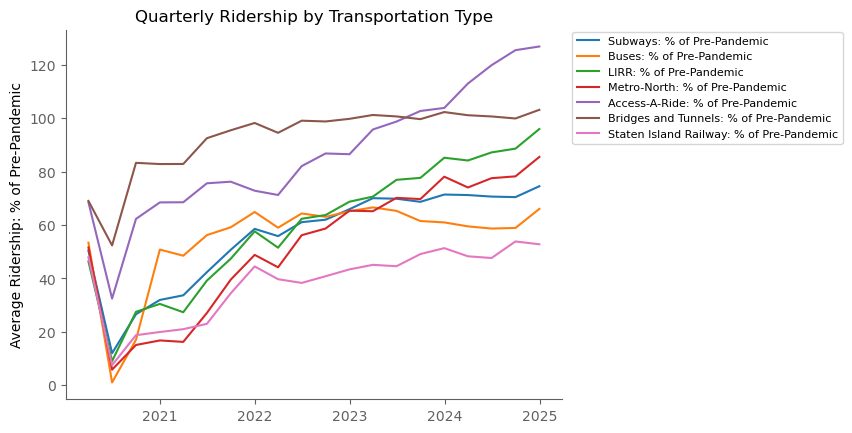

In [24]:

fig, ax = plt.subplots()

for service in services:    
    if service == 'LIRR':
        service_pct = f'{service} : % of Pre-Pandemic' 
    else:
        service_pct = f'{service}: % of Pre-Pandemic'  
    print(service_pct)
    ax.plot(
        quarterly_data['Date'],
        quarterly_data[service_pct],        
        label=f'{service}: % of Pre-Pandemic',
        #color=colours_pct[services.index(service)]
        color=full_colours[services.index(service)]
    )

#ax.set_xlabel('Date')
ax.set_ylabel('Average Ridership: % of Pre-Pandemic')
ax.set_title('Quarterly Ridership by Transportation Type')
ax.xticks=np.arange(min(quarterly_data['Date'].dt.year),max(quarterly_data['Date'].dt.year),step=1)

handles, labels = services_legend
ax.legend(
   bbox_to_anchor= (1.01,1.01),
   fontsize = 8
)

# Format the X & Y axes and remove the top and right borders

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_color('#606060')
ax.spines['bottom'].set_color('#606060')
ax.tick_params(axis='x', colors='#606060')  # X-axis ticks and labels
ax.tick_params(axis='y', colors='#606060')  # Y-axis ticks and labels


plt.show();

In [25]:
#Show the monthly_data for testing
monthly_data.head()

,Date,Subways,Subways: % of Pre-Pandemic,Buses,Buses: % of Pre-Pandemic,LIRR,LIRR : % of Pre-Pandemic,Metro-North,Metro-North: % of Pre-Pandemic,Access-A-Ride,Access-A-Ride: % of Pre-Pandemic,Bridges and Tunnels,Bridges and Tunnels: % of Pre-Pandemic,Staten Island Railway,Staten Island Railway: % of Pre-Pandemic
0,2020-03-31,2375.007194,50.387097,1028.122065,53.419355,116.942710,46.387097,125.508613,51.580645,18.010645,68.548387,620.486129,69.032258,6.470452,47.967742
1,2020-04-30,391.015800,8.233333,15.717167,1.000000,7.244433,2.833333,8.144567,3.166667,6.061733,23.066667,330.540167,35.533333,0.655900,5.766667
2,2020-05-31,492.769387,10.774194,13.248516,1.000000,16.191226,7.322581,10.834452,5.129032,7.634129,30.064516,490.697548,52.064516,0.756677,6.612903
3,2020-06-30,797.610133,17.066667,21.945800,1.200000,39.887833,17.066667,20.593033,9.333333,11.547900,44.366667,677.180433,69.566667,1.372467,10.366667
4,2020-07-31,1048.676161,23.967742,26.713161,1.580645,57.693452,24.645161,29.492097,13.354839,14.365613,57.161290,763.319355,80.838710,2.009677,18.129032


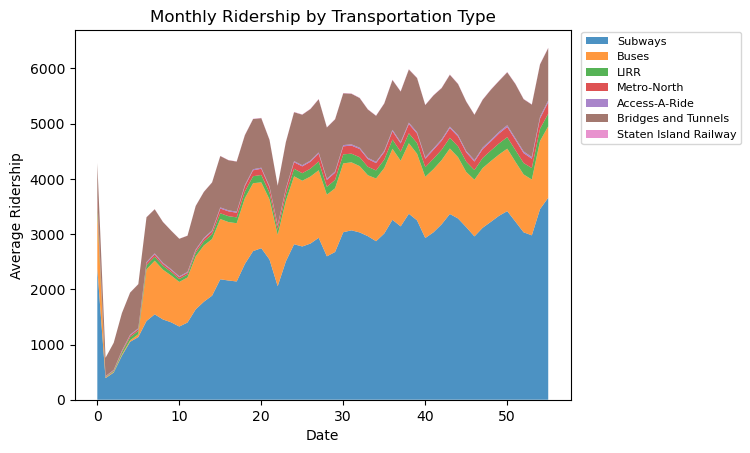

In [26]:
fig, ax = plt.subplots()
#full_colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
colours = ['#1f77b4', '#b0b0b0', '#b0b0b0', '#b0b0b0', '#b0b0b0', '#8c564b', '#b0b0b0']
services = ['Subways', 'Buses', 'LIRR', 'Metro-North', 'Access-A-Ride', 'Bridges and Tunnels', 'Staten Island Railway']
rider_data = monthly_data[services]
ax.stackplot(
    rider_data.index,
    rider_data.T,
    labels = services,
    colors = full_colours,
    alpha = 0.8        
);

ax.set_xlabel('Date')
ax.set_ylabel('Average Ridership')
ax.set_title('Monthly Ridership by Transportation Type')

handles, labels = ax.get_legend_handles_labels()
ax.legend(
   bbox_to_anchor= (1.01,1.01),fontsize = 8
)

#ax.legend()  # Displays the legend for each series

plt.show();

#### Create KPI Visuals

In [27]:
# Select the recovery percentage columns
recovery_columns = [
    'Subways: % of Pre-Pandemic', 'Buses: % of Pre-Pandemic', 'LIRR : % of Pre-Pandemic',
    'Metro-North: % of Pre-Pandemic', 'Access-A-Ride: % of Pre-Pandemic',
    'Bridges and Tunnels: % of Pre-Pandemic', 'Staten Island Railway: % of Pre-Pandemic'
]
monthly_data = monthly_data[recovery_columns]
quarterly_data = quarterly_data[recovery_columns]

In [28]:
# Get the last month or quarter data to display as the latest KPI values
latest_month = monthly_data.iloc[-1]
latest_quarter = quarterly_data.iloc[-1]

# Example: Print KPI indicators for the latest month
for service, recovery in latest_month.items():
    status = "⬆️" if recovery >= 90 else ("➡️" if 50 <= recovery < 90 else "⬇️")
    print(f"{service}: {recovery:.2f}% of Pre-Pandemic {status}")

Subways: % of Pre-Pandemic: 74.55% of Pre-Pandemic ➡️
Buses: % of Pre-Pandemic: 66.06% of Pre-Pandemic ➡️
LIRR : % of Pre-Pandemic: 95.97% of Pre-Pandemic ⬆️
Metro-North: % of Pre-Pandemic: 85.52% of Pre-Pandemic ➡️
Access-A-Ride: % of Pre-Pandemic: 126.87% of Pre-Pandemic ⬆️
Bridges and Tunnels: % of Pre-Pandemic: 103.16% of Pre-Pandemic ⬆️
Staten Island Railway: % of Pre-Pandemic: 52.81% of Pre-Pandemic ➡️


In [29]:
latest_month.info()

<class 'pandas.core.series.Series'>
Index: 7 entries, Subways: % of Pre-Pandemic to Staten Island Railway: % of Pre-Pandemic
Series name: 55
Non-Null Count  Dtype  
--------------  -----  
7 non-null      float64
dtypes: float64(1)
memory usage: 112.0+ bytes


<Figure size 640x480 with 0 Axes>

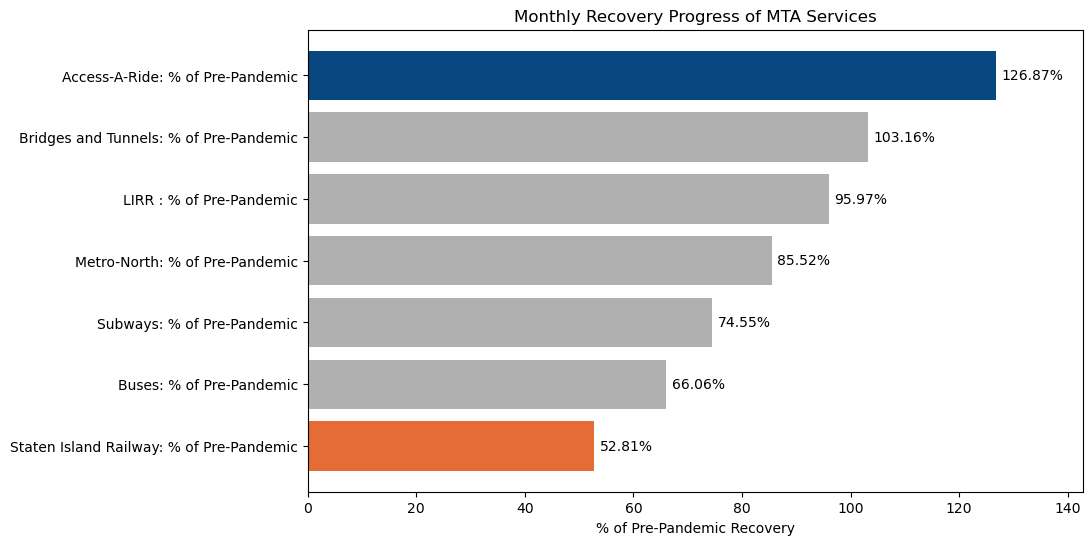

In [30]:
# Get the maximum recovery value to set the colour of the highest value
# It is strange that to get the chart to show with the highest value at the top
# I need to set ascending=True not ascending=False.

latest_month = latest_month.sort_values(ascending=True)
max_recovery = 0
min_recovery = 9999
for recovery in latest_month:
    if recovery > max_recovery:
        max_recovery = recovery
    if recovery < min_recovery:
        min_recovery = recovery
        
group_colours = [
    "#094780" if recovery == max_recovery
    else "#e66c37" if recovery == min_recovery
    else '#b0b0b0' for recovery in latest_month]

# Original code showing grouped colour banding
#group_colours = [
#    "#e1c233" if recovery == max_recovery
#    else "#D9534F" if recovery < 60 
#    else "#F0AD4E" if recovery < 90 
#    else "#5CB85C" for recovery in latest_month]

fig = plt.figure(constrained_layout=True)
fig = plt.figure(figsize=(10, 6))

# Plot the KPI indicators as a bar chart
plt.barh(
    latest_month.index, 
    latest_month.values, 
    color=group_colours
)
plt.xlabel('% of Pre-Pandemic Recovery')
plt.title('Monthly Recovery Progress of MTA Services')
plt.xlim(0,recovery*1.125) # Give a 20 buffer to maximum recovery value to allow for data labels to fit into chart
# Add value labels to each bar
for index, value in enumerate(latest_month.values):
    plt.text(value + 1, index, f"{value:.2f}%", va='center')

plt.savefig('Recovery Progress.png')
plt.show();
